In [4]:
import pandas as pd

data_nomrmalized = pd.read_csv('02-data-wholesale.csv')
data_nomrmalized

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.258174,0.409041,0.260774,0.012134,0.230776,0.227777
1,1.0,1.0,0.143783,0.415602,0.330021,0.111518,0.284258,0.302508
2,0.0,1.0,0.270322,0.048611,0.145534,0.409540,0.043546,0.304556
3,1.0,1.0,0.460905,0.228144,0.248249,0.249743,0.153275,0.884149
4,1.0,1.0,0.191806,0.349523,0.176759,0.041153,0.154830,0.247057
...,...,...,...,...,...,...,...,...
391,0.0,1.0,0.340970,0.164749,0.275713,0.042565,0.204597,0.142467
392,0.0,1.0,0.605381,0.511077,0.552876,0.841680,0.015466,0.375533
393,0.0,1.0,0.799531,0.058623,0.026257,0.287943,0.007776,0.399761
394,0.0,1.0,0.209682,0.082055,0.076907,0.065036,0.014256,0.362054


### select k

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

ideal_k = []
for i in range(1, 21):
    est_kmeans = KMeans(n_clusters=i)
    est_kmeans.fit(data_nomrmalized)
    ideal_k.append([i, est_kmeans.inertia_])

ideal_k = np.array(ideal_k)
ideal_k

array([[  1.        , 227.68342247],
       [  2.        , 122.96539796],
       [  3.        ,  82.30310636],
       [  4.        ,  71.38826454],
       [  5.        ,  62.50260201],
       [  6.        ,  57.55405238],
       [  7.        ,  52.93789248],
       [  8.        ,  49.00132057],
       [  9.        ,  44.94528117],
       [ 10.        ,  42.96614994],
       [ 11.        ,  41.18866113],
       [ 12.        ,  38.92774511],
       [ 13.        ,  38.07574707],
       [ 14.        ,  35.92084317],
       [ 15.        ,  34.9603224 ],
       [ 16.        ,  33.66917149],
       [ 17.        ,  32.58589695],
       [ 18.        ,  31.19518976],
       [ 19.        ,  30.47288797],
       [ 20.        ,  29.60753167]])

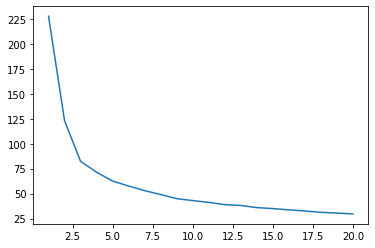

In [7]:
plt.plot(ideal_k[:,0], ideal_k[:,1])
plt.show()

### use k=6

In [12]:
est_kmeans = KMeans(n_clusters=6)
est_kmeans.fit(data_nomrmalized)
pred_kmeans = est_kmeans.predict(data_nomrmalized)

data = pd.read_csv('02-data.csv')

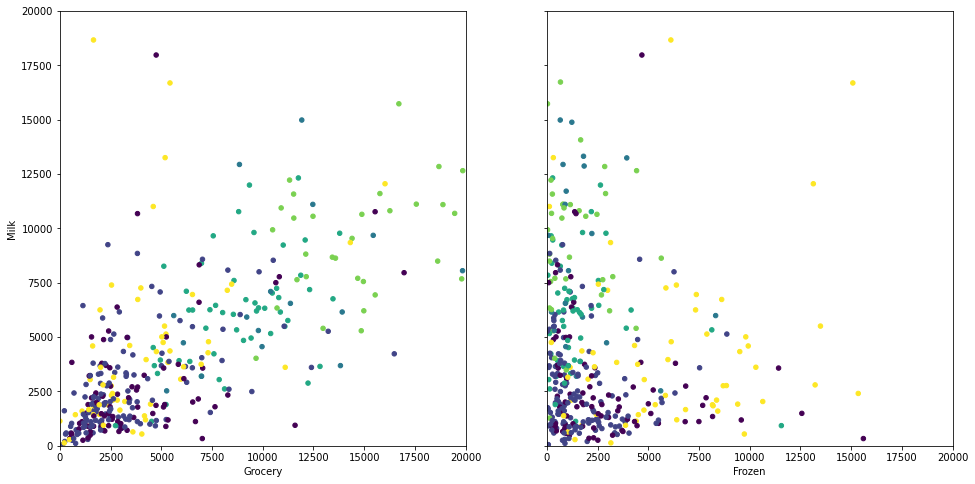

In [13]:
plt.subplots(1, 2, sharex='col', sharey='row', figsize=(16,8))
plt.scatter(data.iloc[:,5], data.iloc[:,3], c=pred_kmeans, s=20)
plt.xlim([0, 20000])
plt.ylim([0,20000])
plt.xlabel('Frozen')
plt.subplot(1, 2, 1)
plt.scatter(data.iloc[:,4], data.iloc[:,3], c=pred_kmeans, s=20)
plt.xlim([0, 20000])
plt.ylim([0,20000])
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()